# **Predicting the Sale Price of Bulldozers using Machine Learning**

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

Since we're trying to predict a number, this kind of problem is known as a regression problem.

The data and evaluation metric we'll be using (root mean square log error or RMSLE) is from the [Kaggle Bluebook for Bulldozers competition](https://www.kaggle.com/c/bluebook-for-bulldozers/overview).

# 1. Problem Definition

For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,

> How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

# 2. Data
Looking at the [dataset from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data), you can you it's a time series problem. This means there's a time attribute to dataset.

In this case, it's historical sales data of bulldozers. Including things like, model type, size, sale date and more.

There are 3 datasets:

1. **Train.csv** - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including SalePrice which is the target variable).

1. **Valid.csv** - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as Train.csv).
Test.csv - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict).

1.  **Test.csv** - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict).

# 3. Evaluation
For this problem, [Kaggle has set the evaluation metric to being root mean squared log error (RMSLE)](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation). As with many regression evaluations, the goal will be to get this value as low as possible.

# 4. Features
Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

For this dataset, Kaggle provide a data dictionary which contains information about what each attribute of the dataset means. [You can download this file directly from the Kaggle competition page (account required) or view it on Google Sheets)](https://www.kaggle.com/c/bluebook-for-bulldozers/download/Bnl6RAHA0enbg0UfAvGA%2Fversions%2FwBG4f35Q8mAbfkzwCeZn%2Ffiles%2FData%20Dictionary.xlsx).

With all of this being known, let's get started!

First, we'll import the dataset and start exploring. Since we know the evaluation metric we're trying to minimise, our first goal will be building a baseline model and seeing how it stacks up against the competition.

## Importing the data and preparing it for modelling

In [2]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Now we've got our tools for data analysis ready, we can import the data and start to explore it.

In [ ]:
df = pd.read_csv('TrainAndValid.csv')

In [ ]:
# No parse_dates... check dtype of "saledate"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7101 entries, 0 to 7100
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   SalesID                   7101 non-null   int64 
 1   SalePrice                 7101 non-null   int64 
 2   MachineID                 7101 non-null   int64 
 3   ModelID                   7101 non-null   int64 
 4   datasource                7101 non-null   int64 
 5   auctioneerID              7101 non-null   int64 
 6   YearMade                  7101 non-null   int64 
 7   MachineHoursCurrentMeter  7101 non-null   int64 
 8   UsageBand                 6200 non-null   object
 9   saledate                  7101 non-null   object
 10  fiModelDesc               7101 non-null   object
 11  fiBaseModel               7101 non-null   object
 12  fiSecondaryDesc           4621 non-null   object
 13  fiModelSeries             975 non-null    object
 14  fiModelDescriptor       

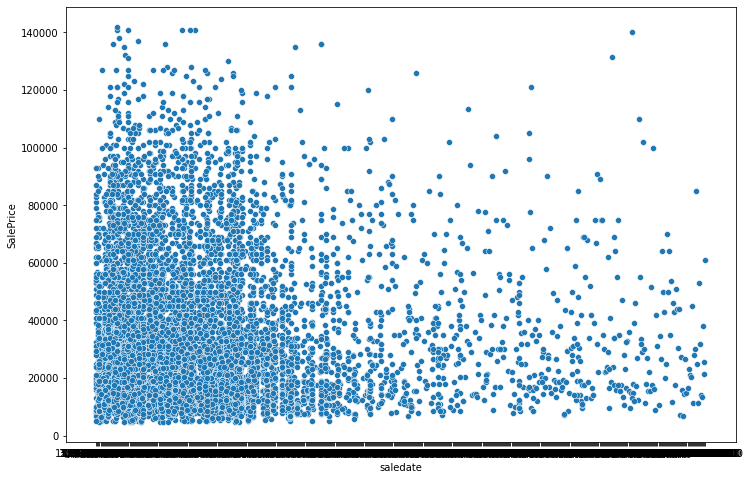

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sns.scatterplot(x = df['saledate'][:10000] , y = df['SalePrice'][:10000])

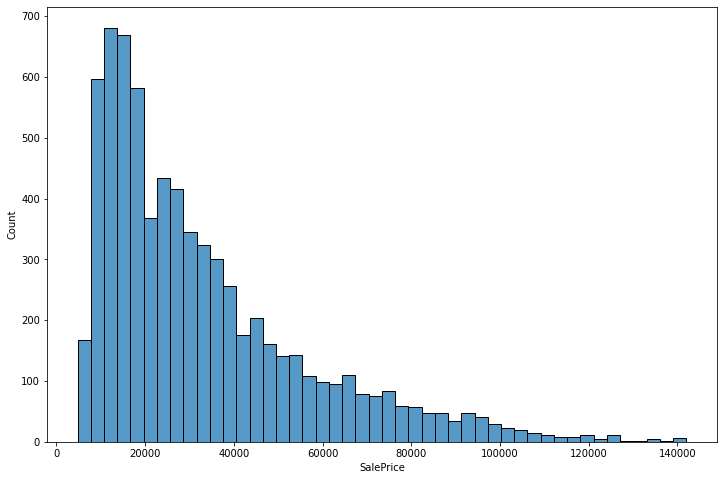

In [ ]:
plt.figure(figsize = (12,8))
sns.histplot(data = df['SalePrice'])

# Parsing dates

When working with time series data, it's a good idea to make sure any date data is the format of a datetime object (a Python data type which encodes specific information about dates).

In [ ]:
df = pd.read_csv('TrainAndValid.csv', parse_dates=['saledate'])

In [4]:
# With parse_dates... check dtype of "saledate"
df.info()

# saledate 50391 non-null  datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65347 entries, 0 to 65346
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   65347 non-null  int64         
 1   SalePrice                 65347 non-null  int64         
 2   MachineID                 65347 non-null  int64         
 3   ModelID                   65347 non-null  int64         
 4   datasource                65347 non-null  int64         
 5   auctioneerID              65347 non-null  int64         
 6   YearMade                  65347 non-null  int64         
 7   MachineHoursCurrentMeter  25601 non-null  float64       
 8   UsageBand                 22675 non-null  object        
 9   saledate                  65347 non-null  datetime64[ns]
 10  fiModelDesc               65347 non-null  object        
 11  fiBaseModel               65347 non-null  object        
 12  fiSecondaryDesc   

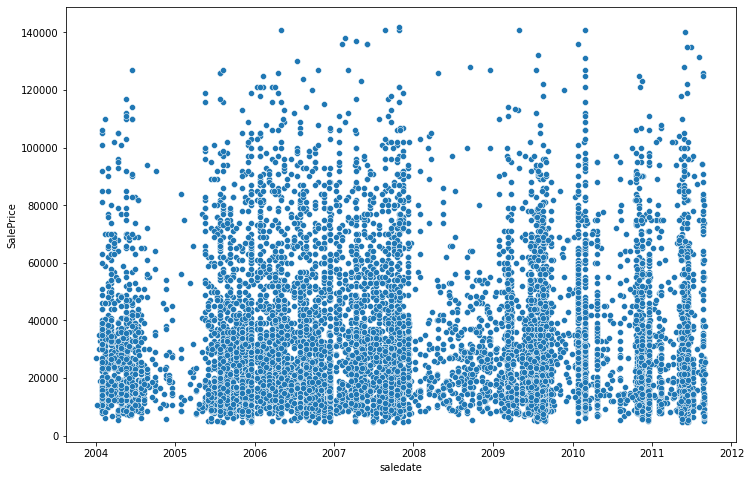

In [5]:
fig, ax = plt.subplots(figsize = (12,8))
sns.scatterplot(x = df['saledate'][:10000] , y = df['SalePrice'][:10000])

Now we can have a better notion about the sales distribuition over the year occuried.

In [6]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [11]:
df['saledate'].head()

28603   1989-01-31
28757   1989-01-31
54438   1989-01-31
53101   1989-01-31
63167   1989-01-31
Name: saledate, dtype: datetime64[ns]

# Sort DataFrame by saledate

As we're working on a time series problem and trying to predict future examples given past examples, it makes sense to sort our data by date.

In [10]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head()

28603   1989-01-31
28757   1989-01-31
54438   1989-01-31
53101   1989-01-31
63167   1989-01-31
Name: saledate, dtype: datetime64[ns]

# Make a copy of the original DataFrame
Since we're going to be manipulating the data, we'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again.

In [12]:
df_tmp = df.copy()

# Add datetime parameters for saledate column
So we can enrich our dataset with as much information as possible.

Because we imported the data using `read_csv()` and we asked pandas to parse the dates using `parase_dates=["saledate"]`, we can now access the different datetime attributes of the saledate column.

In [13]:
# Add datetime parameters for saledate
df_tmp["saleYear"] = df_tmp['saledate'].dt.year
df_tmp["saleMonth"] = df_tmp['saledate'].dt.month
df_tmp["saleDay"] = df_tmp['saledate'].dt.day
df_tmp["saleDayofweek"] =df_tmp['saledate'].dt.dayofweek
df_tmp["saleDayofyear"] = df_tmp['saledate'].dt.dayofyear

# Drop original saledate
df_tmp.drop("saledate", axis=1, inplace=True)

We could add more of these style of columns, such as, whether it was the start or end of a quarter but these will do for now.

Challenge: See what other datetime attributes you can add to df_tmp using a similar technique to what we've used above. Hint: check the bottom of the [pandas.DatetimeIndex docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html).

In [15]:
df_tmp.head().T

,28603,28757,54438,53101,63167
SalesID,1259551,1259760,1301582,1298915,1329620
SalePrice,9500,8000,24000,49000,26500
MachineID,1292226,1476205,1199381,1338785,1253848
ModelID,6788,6788,4123,4124,4089
datasource,132,132,132,132,132
auctioneerID,18,99,18,99,99
YearMade,1977,1978,1974,1984,1987
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,580,580,D6C,D6D,D3B


In [17]:
df.loc[0].loc['saledate'].year

2006

In [18]:
# Check the different values of different columns
df_tmp.state.value_counts()

Texas             8370
Florida           8286
California        4269
Georgia           2607
Ohio              2221
Pennsylvania      2048
Washington        1994
Illinois          1962
North Carolina    1920
Mississippi       1807
Tennessee         1718
Colorado          1655
Arizona           1603
Louisiana         1591
New Jersey        1581
Alabama           1563
New York          1463
Maryland          1448
South Carolina    1352
Minnesota         1278
Kentucky          1240
Missouri          1226
Nevada            1113
Indiana           1108
Maine              975
Connecticut        809
Arkansas           767
Virginia           678
Utah               604
Wisconsin          557
West Virginia      544
New Mexico         540
Oklahoma           463
Oregon             444
Michigan           431
Idaho              390
Wyoming            368
Kansas             356
Iowa               354
New Hampshire      332
Unspecified        311
Delaware           178
Montana            175
Massachuset

# 5. Modelling

We've explored our dataset a little as well as enriched it with some datetime attributes, now let's try to model.

Why model so early?

We know the evaluation metric we're heading towards. We could spend more time doing exploratory data analysis (EDA), finding more out about the data ourselves but what we'll do instead is use a machine learning model to help us do EDA.

Remember, one of the biggest goals of starting any new machine learning project is reducing the time between experiments.

Following the Scikit-Learn machine learning map, we find a RandomForestRegressor() might be a good candidate.

In [20]:
# Check for missing categories and different datatypes
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65347 entries, 28603 to 23972
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   65347 non-null  int64  
 1   SalePrice                 65347 non-null  int64  
 2   MachineID                 65347 non-null  int64  
 3   ModelID                   65347 non-null  int64  
 4   datasource                65347 non-null  int64  
 5   auctioneerID              65347 non-null  int64  
 6   YearMade                  65347 non-null  int64  
 7   MachineHoursCurrentMeter  25601 non-null  float64
 8   UsageBand                 22675 non-null  object 
 9   fiModelDesc               65347 non-null  object 
 10  fiBaseModel               65347 non-null  object 
 11  fiSecondaryDesc           47683 non-null  object 
 12  fiModelSeries             4577 non-null   object 
 13  fiModelDescriptor         10481 non-null  object 
 14  Pr

# Convert strings to categories

One way to help turn all of our data into numbers is to convert the columns with the string datatype into a category datatype.

To do this we can use the pandas types API which allows us to interact and manipulate the types of data.

In [21]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [22]:
# These columns contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [24]:
# This will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [25]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65347 entries, 28603 to 23972
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   65347 non-null  int64   
 1   SalePrice                 65347 non-null  int64   
 2   MachineID                 65347 non-null  int64   
 3   ModelID                   65347 non-null  int64   
 4   datasource                65347 non-null  int64   
 5   auctioneerID              65347 non-null  int64   
 6   YearMade                  65347 non-null  int64   
 7   MachineHoursCurrentMeter  25601 non-null  float64 
 8   UsageBand                 22675 non-null  category
 9   fiModelDesc               65347 non-null  category
 10  fiBaseModel               65347 non-null  category
 11  fiSecondaryDesc           47683 non-null  category
 12  fiModelSeries             4577 non-null   category
 13  fiModelDescriptor         10481 non-null  

In [26]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

All of our data is categorical and thus we can now turn the categories into numbers, however it's still missing values...

In [27]:
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.000000
YearMade                    0.000000
MachineHoursCurrentMeter    0.608230
UsageBand                   0.653006
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.270311
fiModelSeries               0.929959
fiModelDescriptor           0.839610
ProductSize                 0.650726
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.639142
Enclosure                   0.000321
Forks                       0.400263
Pad_Type                    0.677154
Ride_Control                0.537729
Stick                       0.677154
Transmission                0.432522
Turbocharged                0.677154
B

In [29]:
# Check missing values
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    39746
UsageBand                   42672
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc             17664
fiModelSeries               60770
fiModelDescriptor           54866
ProductSize                 42523
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                41766
Enclosure                      21
Forks                       26156
Pad_Type                    44250
Ride_Control                35139
Stick                       44250
Transmission                28264
Turbocharged                44250
Blade_Extension             62866
Blade_Width                 62866
Enclosure_Type

# Fill missing values
From our experience with machine learning models. We know two things:

All of our data has to be numerical
There can't be any missing values
And as we've seen using `df_tmp.isna().sum()` our data still has plenty of missing values.

Let's fill them.

# Filling numerical values first
We're going to fill any column with missing values with the median of that colum

In [30]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofweek
saleDayofyear


In [31]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

MachineHoursCurrentMeter


In [32]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp[label] = content.fillna(content.median())

Why add a binary column indicating whether the data was missing or not?

We can easily fill all of the missing numeric values in our dataset with the median. However, a numeric value may be missing for a reason. In other words, absence of evidence may be evidence of absence. Adding a binary column which indicates whether the value was missing or not helps to retain this information.

In [33]:
# Check if there's any null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

# Filling and turning categorical variables to numbers

Now we've filled the numeric values, we'll do the same with the categorical values at the same time as turning them into numbers.

In [40]:
# Check columns which *aren't* numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [41]:
for label, content in df_tmp.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_tmp[label] = pd.Categorical(content).codes+1      

In [42]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65347 entries, 28603 to 23972
Columns: 102 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int64(12), int8(42)
memory usage: 14.7 MB


In [44]:
df_tmp.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

In [45]:
df_tmp.head().T

,28603,28757,54438,53101,63167
SalesID,1259551,1259760,1301582,1298915,1329620
SalePrice,9500,8000,24000,49000,26500
MachineID,1292226,1476205,1199381,1338785,1253848
ModelID,6788,6788,4123,4124,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,False,False,False
Blade_Type_is_missing,True,True,False,False,False
Travel_Controls_is_missing,True,True,False,False,False
Differential_Type_is_missing,True,True,True,True,True


Now all of our data is numeric and there are no missing values, we should be able to build a machine learning model!

Let's reinstantiate our trusty RandomForestRegressor.

This will take a few minutes which is too long for interacting with it. So what we'll do is create a subset of rows to work with.

In [139]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model
model = RandomForestRegressor(n_jobs=-1, )

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp.SalePrice)

RandomForestRegressor(n_jobs=-1)

# Splitting data into train/valid sets

In [49]:
df_tmp.head()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
28603,1259551,9500,1292226,6788,132,18,1977,2631.0,0,619,...,True,True,True,True,True,True,True,True,True,True
28757,1259760,8000,1476205,6788,132,99,1978,2631.0,0,619,...,True,True,True,True,True,True,True,True,True,True
54438,1301582,24000,1199381,4123,132,18,1974,2631.0,0,1335,...,True,True,True,True,True,False,False,False,True,True
53101,1298915,49000,1338785,4124,132,99,1984,2631.0,0,1338,...,True,True,True,True,True,False,False,False,True,True
63167,1329620,26500,1253848,4089,132,99,1987,2631.0,0,1234,...,True,True,True,True,True,False,False,False,True,True


According to the Kaggle data page, the validation set and test set are split according to dates.

Knowing this, randomly splitting our data into train and test sets using something like train_test_split() wouldn't work.

Instead, we split our data into training, validation and test sets using the date each sample occured.

In [52]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2011]
df_train = df_tmp[df_tmp.saleYear != 2011]

len(df_val), len(df_train)

(5574, 59773)

In [53]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((59773, 101), (59773,), (5574, 101), (5574,))

# Building an evaluation function

According to Kaggle for the Bluebook for Bulldozers competition, the evaluation function they use is root mean squared log error (RMSLE).

RMSLE = generally you don't care as much if you're off by $10 as much as you'd care if you were off by 10%, you care more about ratios rather than differences. MAE (mean absolute error) is more about exact differences.

It's important to understand the evaluation metric you're going for.

Since Scikit-Learn doesn't have a function built-in for RMSLE, we'll create our own.

We can do this by taking the square root of Scikit-Learn's mean_squared_log_error (MSLE). MSLE is the same as taking the log of mean squared error (MSE).

In [54]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

# Testing our model on a subset (to tune the hyperparameters)

Retraing an entire model would take far too long to continuing experimenting as fast as we want to.

So what we'll do is take a sample of the training set and tune the hyperparameters on that before training a larger model.

If you're experiments are taking longer than 10-seconds (give or take how long you have to wait), you should be trying to speed things up. You can speed things up by sampling less data or using a faster computer.

In [55]:
# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000)

Setting `max_samples` to 10000 means every `n_estimator` (default 100) in our `RandomForestRegressor` will only see 10000 random samples from our DataFrame instead of the entire 400,000.

In other words, we'll be looking at `40x less` samples which means we'll get faster computation speeds but we should expect our results to worsen (simple the model has less samples to learn patterns from).

In [56]:
%%time
# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train, y_train)

CPU times: user 30.7 s, sys: 55.3 ms, total: 30.8 s
Wall time: 18.4 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [57]:
show_scores(model)

{'Training MAE': 3611.2415503655498,
 'Valid MAE': 6432.020862935055,
 'Training RMSLE': 0.1891490720759794,
 'Valid RMSLE': 0.2805989458297016,
 'Training R^2': 0.921027323245002,
 'Valid R^2': 0.8300954739230997}

# Hyperparameter tuning with RandomizedSearchCV

You can increase n_iter to try more combinations of hyperparameters but in our case, we'll try 20 and see where it gets us.

Remember, we're trying to reduce the amount of time it takes between experiments.

In [58]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 5min 51s, sys: 1.52 s, total: 5min 52s
Wall time: 6min 8s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [59]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 18,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [60]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 4171.377161077307,
 'Valid MAE': 6585.679354607894,
 'Training RMSLE': 0.2130336862416146,
 'Valid RMSLE': 0.2877187198107538,
 'Training R^2': 0.8944854191669593,
 'Valid R^2': 0.8231812464316192}

# Train a model with the best parameters

In a model I prepared earlier, I tried 100 different combinations of hyperparameters (setting n_iter to 100 in RandomizedSearchCV) and found the best results came from the ones you see below.

We'll instantiate a new model with these discovered hyperparameters and reset the max_samples back to its original value.

In [61]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

CPU times: user 48.6 s, sys: 119 ms, total: 48.7 s
Wall time: 30.4 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1)

In [62]:
show_scores(ideal_model)

{'Training MAE': 2603.481847678975,
 'Valid MAE': 5885.96519680077,
 'Training RMSLE': 0.13897799588494217,
 'Valid RMSLE': 0.25716886612033996,
 'Training R^2': 0.9588051019487749,
 'Valid R^2': 0.8582182740582125}

With these new hyperparameters as well as using all the samples, we can see an improvement to our models performance.

You can make a faster model by altering some of the hyperparameters. Particularly by lowering n_estimators since each increase in n_estimators is basically building another small model.

However, lowering of n_estimators or altering of other hyperparameters may lead to poorer results.

In [63]:
%%time
# Faster model
fast_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1)
fast_model.fit(X_train, y_train)

CPU times: user 22.7 s, sys: 103 ms, total: 22.8 s
Wall time: 13.6 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [64]:
show_scores(fast_model)

{'Training MAE': 2252.101125014563,
 'Valid MAE': 5918.385445822439,
 'Training RMSLE': 0.1242787566214193,
 'Valid RMSLE': 0.2586365257111342,
 'Training R^2': 0.9675056007420221,
 'Valid R^2': 0.855577425104406}

# Make predictions on test data

Now we've got a trained model, it's time to make predictions on the test data.
So what we're doing is trying to use the patterns our model has learned in the training data to predict the sale price of a Bulldozer with characteristics it's never seen before but are assumed to be similar to that of those in the training data.

In [148]:
df_test = pd.read_csv("Test.csv", parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [153]:
# Let's see how the model goes predicting on the test data
model.predict(df_test)

array([19826.5, 24249.5, 45315. , ..., 16245. , 16952.5, 22690. ])

# Preprocessing the data
Our model has been trained on data formatted in the same way as the training data.

This means in order to make predictions on the test data, we need to take the same steps we used to preprocess the training data to preprocess the test data.

Remember: Whatever you do to the training data, you have to do to the test data.

Let's create a function for doing so (by copying the preprocessing steps we used above).

In [150]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofweek"] = df.saledate.dt.dayofweek
    df["saleDayofyear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [151]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [152]:
# We can find how the columns differ using sets
set(df_tmp.columns) - set(df_test.columns)

{'SalePrice'}

Now the test dataset matches the training dataset, we should be able to make predictions on it using our trained model.

In [115]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(df_test)

In [116]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,16664.121822
1,1227844,24819.498995
2,1227847,50787.113840
3,1227848,59507.373616
4,1227863,34491.951366
...,...,...
12452,6643171,31004.593079
12453,6643173,25589.306756
12454,6643184,22569.965774
12455,6643186,27270.339098


# Feature Importance

Since we've built a model which is able to make predictions. The people you share these predictions with (or yourself) might be curious of what parts of the data led to these predictions.

This is where feature importance comes in. Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable.

In our case, after our model learned the patterns in the data, which bulldozer sale attributes were most important for predicting its overall sale price?

Beware: the default feature importances for random forests can lead to non-ideal results.

To find which features were most important of a machine learning model, a good idea is to search something like "[MODEL NAME] feature importance".

Doing this for our RandomForestRegressor leads us to find the feature_importances_ attribute.

Let's check it out.

In [75]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.96956135e-02, 1.08753831e-02, 2.72116364e-02, 7.63386141e-04,
       2.46495606e-03, 1.60971813e-01, 1.53219885e-02, 2.55317005e-03,
       2.74179655e-02, 1.67438702e-02, 9.09901938e-02, 3.65982517e-03,
       8.21351146e-03, 1.88692737e-01, 5.11547429e-02, 5.61650744e-03,
       1.32263980e-02, 1.97678537e-02, 5.14901293e-03, 3.32600838e-02,
       7.22951585e-04, 2.88547717e-04, 6.50826854e-04, 3.70941194e-04,
       3.46160958e-03, 3.81261475e-05, 1.39693227e-03, 3.09496254e-03,
       1.29170153e-04, 1.21291429e-03, 2.41606692e-03, 6.85687705e-04,
       4.75649497e-03, 5.98288191e-04, 1.68061671e-03, 2.71967617e-02,
       7.82644188e-04, 9.63479130e-03, 9.40454005e-04, 1.42472700e-03,
       7.37612290e-03, 6.46354269e-04, 2.15190263e-03, 6.83606875e-04,
       5.28602941e-04, 2.92614482e-04, 3.89293377e-04, 6.47942141e-03,
       1.79463381e-03, 4.66006235e-04, 4.73328774e-04, 5.96718606e-02,
       3.16535396e-03, 5.35707111e-03, 2.06709318e-03, 7.88043762e-03,
      

In [76]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

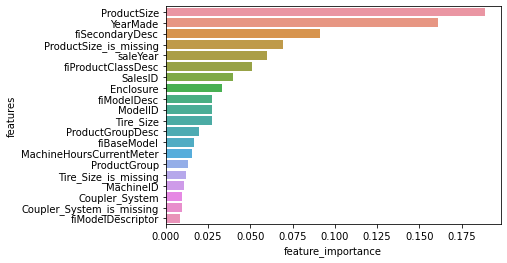

In [77]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [78]:
sum(ideal_model.feature_importances_)

1.0000000000000004

In [79]:
df.ProductSize.value_counts()

Medium            10262
Large / Medium     5446
Mini               2577
Small              1987
Large              1876
Compact             676
Name: ProductSize, dtype: int64

In [80]:
df.Turbocharged.value_counts()

None or Unspecified    20606
Yes                      491
Name: Turbocharged, dtype: int64

In [81]:
df.Thumb.value_counts()

None or Unspecified    8159
Manual                 1053
Hydraulic               742
Name: Thumb, dtype: int64